<a href="https://colab.research.google.com/github/IlyaGalyukshev/colab/blob/main/LogRegression%2BCatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/advanced-dls-spring-2021/overview


## Загрузка данных


In [137]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [138]:
# !gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
# !gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
# !gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [209]:
data = pd.read_csv('./train.csv')

In [210]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [211]:
data = data[data['TotalSpent'] != ' ']
data[num_cols] = data[num_cols].astype('float64')
data

<ipython-input-211-003bc06ed141>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[num_cols] = data[num_cols].astype('float64')


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55.0,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72.0,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1.0,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32.0,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60.0,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3.0,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50.0,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1.0,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29.0,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   float64
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

In [213]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных


In [214]:
import seaborn as sns

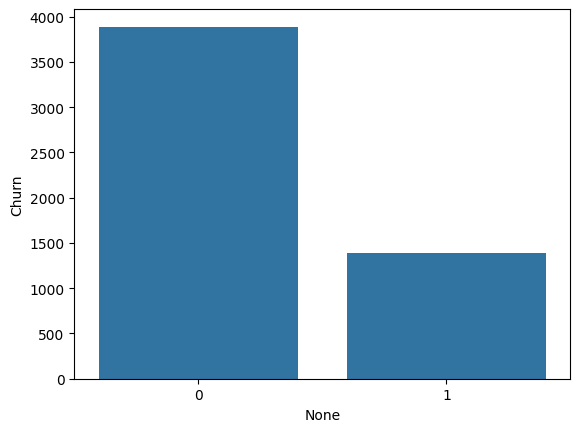

In [215]:
sns.barplot(x=data[target_col].value_counts().index, y=data[target_col].value_counts())
None

Классы не равны, но и несбалансированными их назвать нельзя.

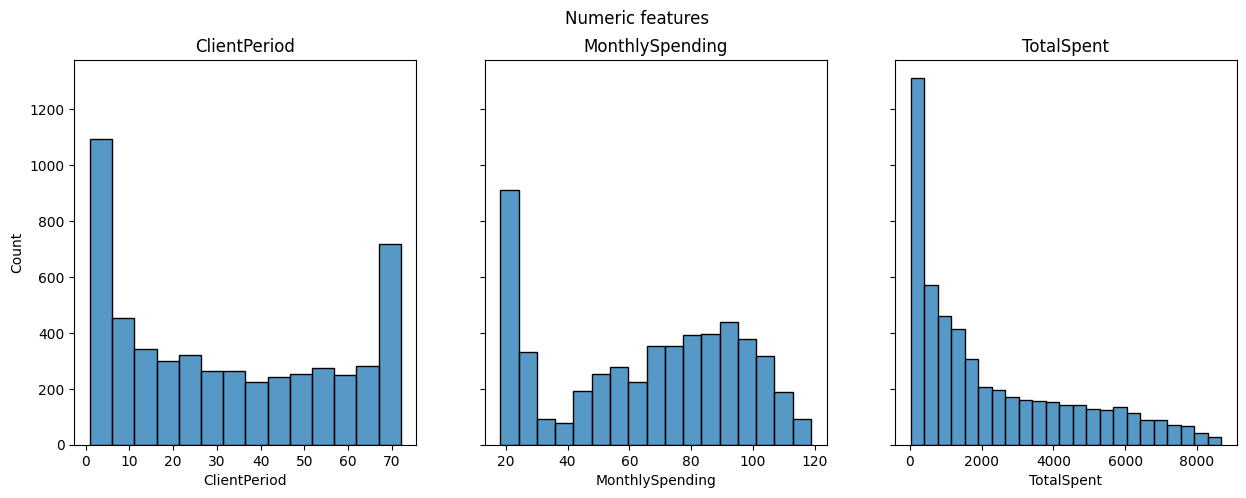

In [147]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Numeric features')
for i in range(3):
  sns.histplot(ax=axes[i], x=data[num_cols[i]])
  axes[i].set_title(num_cols[i])

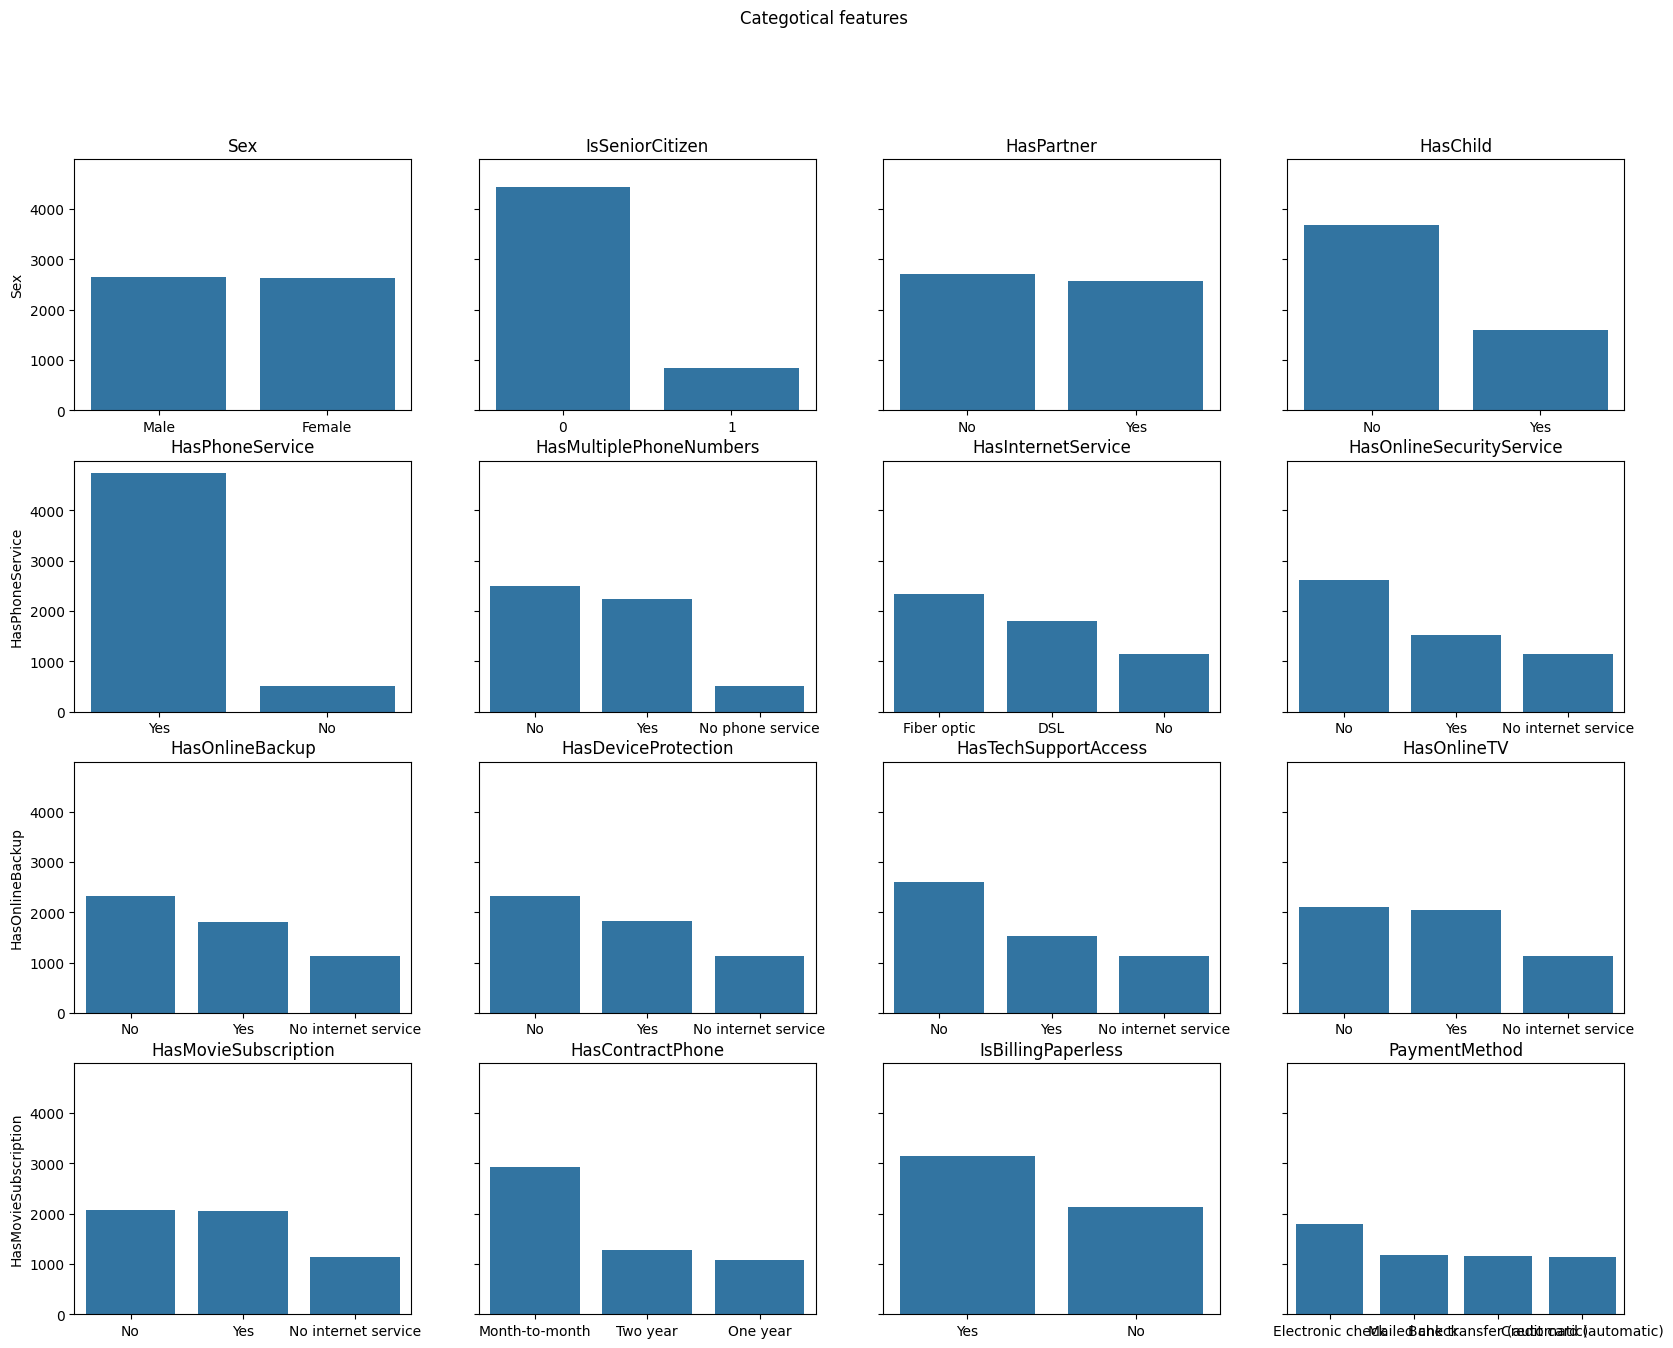

In [148]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15), sharey=True)
fig.suptitle('Categotical features')
for i in range(16):
  sns.barplot(ax=axes[i//4, i%4], x=data[cat_cols[i]].value_counts().index, y=data[cat_cols[i]].value_counts())
  axes[i//4, i%4].set_title(cat_cols[i])
  axes[i//4, i%4].set(xlabel='')

## Применение линейных моделей


In [149]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [150]:
y = data[target_col]
data.drop(columns=[target_col], inplace=True)

In [151]:
prep_pipeline = ColumnTransformer(
    [('numeric', StandardScaler(), num_cols),
     ('categorical', OneHotEncoder(sparse_output=False), cat_cols)])
pipeline = make_pipeline(prep_pipeline, LogisticRegression())

In [152]:
param_grid = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
              'logisticregression__penalty': ['l1', 'l2'],
              'logisticregression__solver': ['liblinear'],
              'logisticregression__max_iter': [500, 1000, 1500]}
model = GridSearchCV(pipeline, param_grid, cv=5, verbose=0, scoring='roc_auc', refit=True)

In [153]:
model.fit(data, y)

print("Best ROC-AUC:", round(model.best_score_, 4))
print("Best parameters:", model.best_params_)

Best ROC-AUC: 0.8449
Best parameters: {'logisticregression__C': 10, 'logisticregression__max_iter': 1000, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


**ROC-AUC: 0.8449**

Лучшие параметры для логрегрессии: {'logisticregression__C': 10, 'logisticregression__max_iter': 1000, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


## Применение градиентного бустинга

In [ ]:
# !pip install catboost

In [192]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [193]:
X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size=0.2)

In [197]:
catboost_clf = CatBoostClassifier(loss_function='Logloss',
                                  cat_features=cat_cols,
                                  eval_metric='AUC',
                                  verbose=False)

In [195]:
catboost_clf.fit(X_train, y_train)
preds = catboost_clf.predict_proba(X_valid)[:,1]
print("ROC-AUC:", round(roc_auc_score(y_valid, preds), 4))

ROC-AUC: 0.8583


**ROC-AUC: 0.8583**

Стандартный catboost показывает себя лучше, чем логрегрессия с подобранными параметрами.

Еще улучшу результат, попытаясь подобрать параметры для catboost.

In [198]:
catboost = catboost_clf.grid_search(
    param_grid={
        'l2_leaf_reg': [0.1, 0.5, 1, 5, 10],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 300, 500, 700],
        'learning_rate': [0.01, 0.05, 0.1]},
    X=data,
    y=y,
    refit=True)


bestTest = 0.8530601512
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8530602	best: 0.8530602 (0)	total: 521ms	remaining: 1m 33s

bestTest = 0.8669650142
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8669650	best: 0.8669650 (1)	total: 1.03s	remaining: 1m 32s

bestTest = 0.8666651921
bestIteration = 71

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8666652	best: 0.8669650 (1)	total: 1.54s	remaining: 1m 30s

bestTest = 0.8531658262
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8531658	best: 0.8669650 (1)	total: 2.07s	remaining: 1m 30s

bes

In [199]:
print(catboost['params'])

{'depth': 5, 'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 100}


**ROC-AUC: 0.8674**

Лучшие параметры для catboost: {'depth': 5, 'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 100}

In [200]:
best_model = CatBoostClassifier(
    depth=5,
    learning_rate=0.05,
    l2_leaf_reg=1,
    iterations=100,
    eval_metric='AUC',
    loss_function='Logloss',
    cat_features=cat_cols,
    verbose=False)

In [201]:
best_model.fit(X_train, y_train)
preds = best_model.predict_proba(X_valid)[:,1]
print("ROC-AUC:", round(roc_auc_score(y_valid, preds), 4))

ROC-AUC: 0.8633


На тестовой выборке лучшая модель показывает

**ROC-AUC: 0.8674**

In [207]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=False)

На Kaggle

**ROC-AUC: 0.85089**